# **Importing libraries**

In [109]:
#Common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import random


#Data Preprocessing

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


#For Modle
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from keras import backend as K
import warnings
import cv2
from sklearn.metrics import accuracy_score


#Visualization
import matplotlib.pyplot as plt
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

#**Reading Data**

In [84]:
#Trainig Data
train_data=pd.read_csv("/content/sign_mnist_train.csv")


#Testing Data
test_data=pd.read_csv("/content/sign_mnist_test.csv")

In [85]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,164,170,119,152,171,171,170,171,172,...,187,150,119,109,85,79,79,78,137,203,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,158,157,155,154,153,152,151,150,149,...,65,77,106,137,174,185,146,121,111,112,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,185,187,182,177,182,182,182,180,180,...,75,78,82,77,75,87,142,203,208,205,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,208,209,206,204,203,202,201,200,199,...,17,16,20,17,17,14,120,217,237,244,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,190,191,192,192,194,182,152,146,189,...,163,200,179,161,150,138,138,151,132,97,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [86]:
labels=train_data['label'].values

In [87]:
from pandas.core.algorithms import unique
#view unique labels

uniqueLabels=np.array(labels)
np.unique(uniqueLabels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

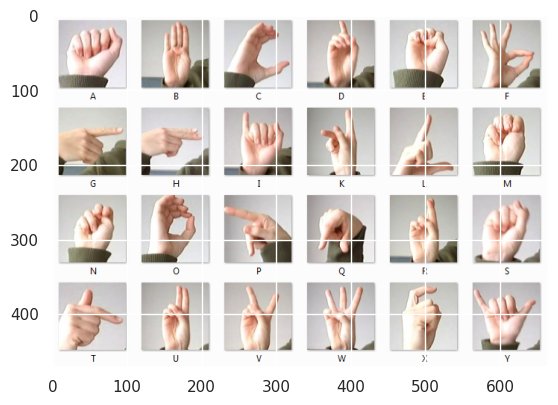

In [110]:
image_path = "/content/amer_sign2.png"
alpha_SL_img = mpimg.imread(image_path)
plt.imshow(alpha_SL_img)
plt.show()

**Data Visualization**

<Axes: ylabel='count'>

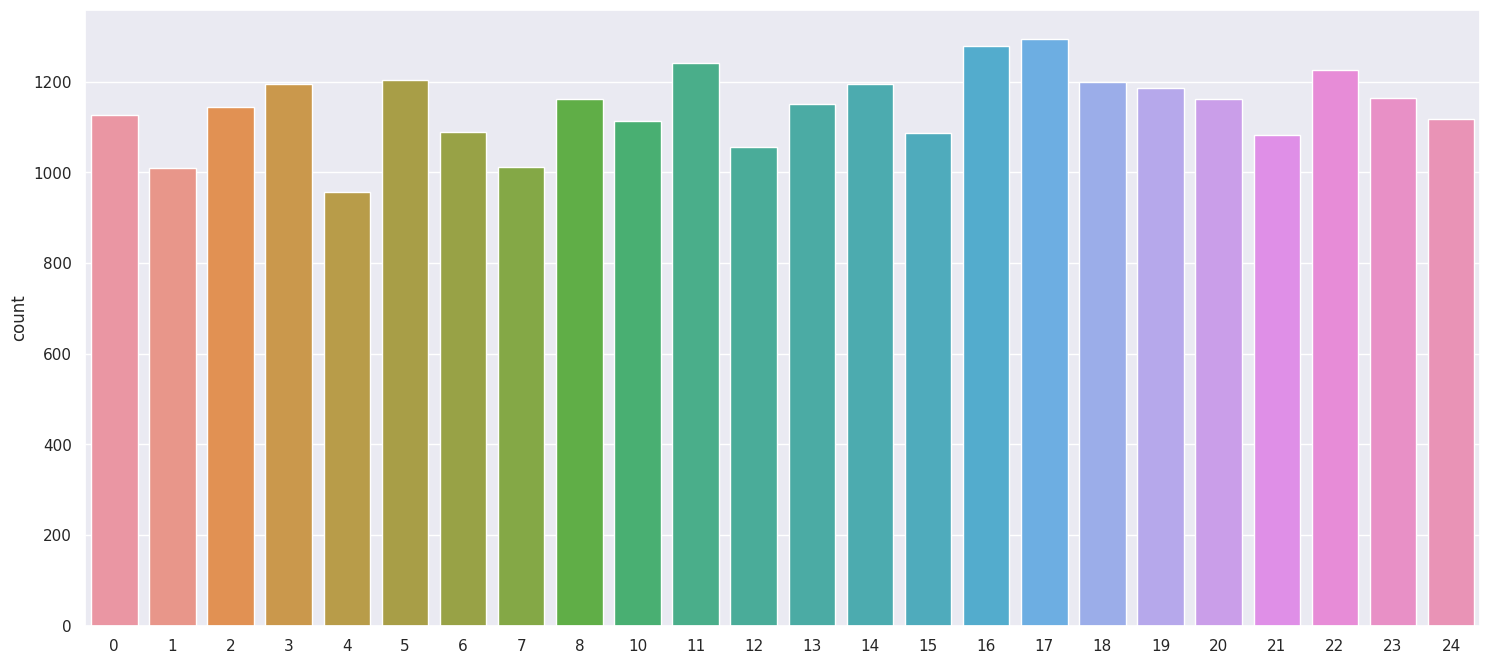

In [88]:
#ploting each class quantities

plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [89]:
#Drop Labels from Training data

train_data.drop('label', axis =1 , inplace=True)

In [90]:
#Reshape images and Flatten
images =train_data.values
images=np.array([np.reshape(i,(28,28))for i in  images])
images =np.array([i.flatten() for i in images])

**Preprocessing Labels**

In [91]:
#One Hot ENcoding

binarized_labels=LabelBinarizer()
labels=binarized_labels.fit_transform(labels)

In [92]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


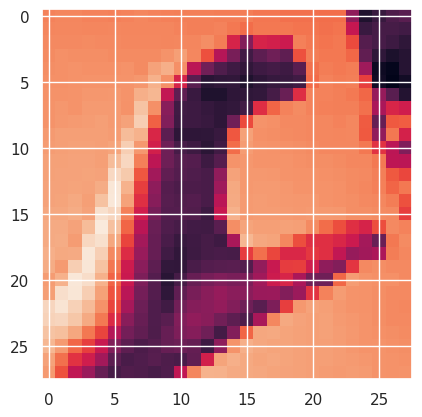

In [93]:
print(labels[2])
plt.imshow(images[2].reshape(28,28))

In [94]:
x_train, x_test,y_train ,y_test=train_test_split(images,labels, test_size=0.3,random_state=101)

#**Preparing Data**

In [95]:
#Defining BAtch size , num of classes, and epochs
batch_size=128
num_of_classes=24  #num of unique labels
epochs =10

In [96]:
#scaling images

x_train=x_train/255
x_test=x_test/255

In [97]:
#Reshapin =g to the required size for the model
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

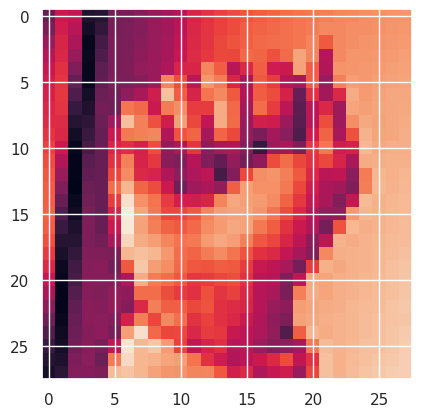

In [98]:
plt.imshow(x_train[0].reshape(28,28))

#**BUILDING THE MODEL**

In [99]:
from keras.src.layers import MaxPooling2D
model =Sequential()
model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))


model.add(Dense(num_of_classes,activation='softmax'))


**compile Model**

In [100]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 64)         

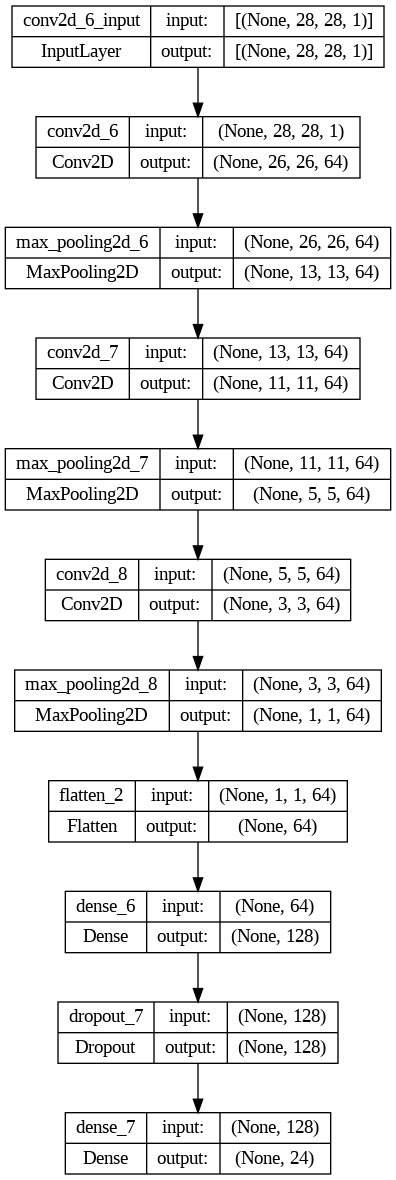

In [102]:
plot_model(model, "UNet.png", show_shapes=True)

**Training Model**

In [103]:
history=model.fit(x_train , y_train , validation_data=(x_test,y_test), epochs=epochs,batch_size=batch_size)



Epoch 1/10
151/151 [==============================] - 30s 190ms/step - loss: 2.5931 - accuracy: 0.2055 - val_loss: 1.6193 - val_accuracy: 0.4802
Epoch 2/10
151/151 [==============================] - 32s 213ms/step - loss: 1.1934 - accuracy: 0.6025 - val_loss: 0.7859 - val_accuracy: 0.7324
Epoch 3/10
151/151 [==============================] - 27s 177ms/step - loss: 0.6946 - accuracy: 0.7625 - val_loss: 0.4277 - val_accuracy: 0.8701
Epoch 4/10
151/151 [==============================] - 27s 179ms/step - loss: 0.4455 - accuracy: 0.8497 - val_loss: 0.3064 - val_accuracy: 0.9053
Epoch 5/10
151/151 [==============================] - 27s 181ms/step - loss: 0.2996 - accuracy: 0.9013 - val_loss: 0.1667 - val_accuracy: 0.9531
Epoch 6/10
151/151 [==============================] - 27s 179ms/step - loss: 0.2054 - accuracy: 0.9344 - val_loss: 0.1247 - val_accuracy: 0.9669
Epoch 7/10
151/151 [==============================] - 29s 190ms/step - loss: 0.1385 - accuracy: 0.9593 - val_loss: 0.0701 - val_ac

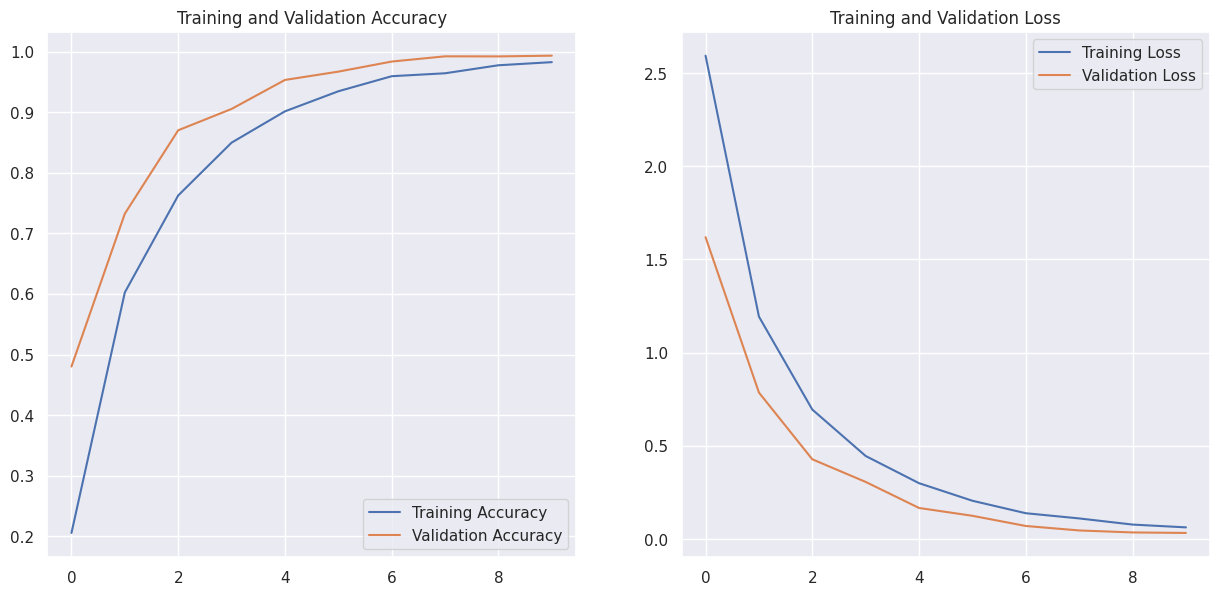

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#**Evaluating Modle**

In [105]:
test_labels=test_data['label']
test_data.drop('label',axis=1 , inplace =True )

test_images=test_data.values
test_images=np.array([np.reshape(i,(28,28))for i in test_images])
test_images=np.array([i.flatten() for i in test_images])


test_labels=binarized_labels.fit_transform(test_labels)

test_images =test_images.reshape(test_images.shape[0],28,28,1)

#test_iamges.shape

y_pred=model.predict(test_images)


225/225 [==============================] - 4s 17ms/step


In [106]:
accuracy_score(test_labels,y_pred.round())

0.8280814277746793

#**Saving Model**

In [107]:
model.save("Sign_language_Classfication.h5")
